In [1]:
from google.cloud import bigquery
client = bigquery.Client()

In [2]:
sql = """
  SELECT
  fog,
  COUNT(1) AS fog_vis,
  AVG(mean_visibility) AS avg_visibilty
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
GROUP BY
  fog
"""
df = client.query(sql).to_dataframe()
df.head()


,fog,fog_vis,avg_visibilty
0,True,2015687,6.974599
1,False,29278686,10.569680


In [4]:
sql1 ="""SELECT
  fog,
  year,
  COUNT(1) AS fog_vis,
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
GROUP BY
  fog,year
ORDER BY fog, year desc"""
df = client.query(sql1).to_dataframe()
df.head()


,fog,year,fog_vis
0,False,2010,980285
1,False,2009,3334594
2,False,2008,3227511
3,False,2007,3081257
4,False,2006,3023726


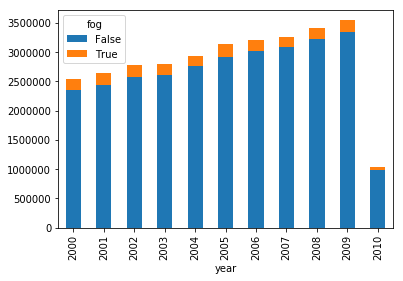

In [11]:
import pandas as pd
pivot_table = df.pivot(index='year', columns='fog', values='fog_vis')
pivot_table.plot(kind='bar', stacked=True)

In [17]:
sql2="""
SELECT
  fog,
  AVG(mean_temp) as avg_mean_temp
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
GROUP BY
  fog
"""

In [18]:
df = client.query(sql2).to_dataframe()
df.head()

,fog,avg_mean_temp
0,False,54.437800
1,True,48.501095


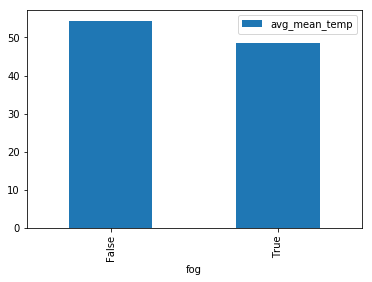

In [20]:
df.plot(x='fog', y='avg_mean_temp', kind='bar');

In [21]:
sql = """
   SELECT
  month,
  AVG(max_sustained_wind_speed) AS avg_max_sustained_wind_speed
FROM
  publicdata.samples.gsod
WHERE
  year >= 2000 AND year <= 2010
GROUP BY
  month
"""


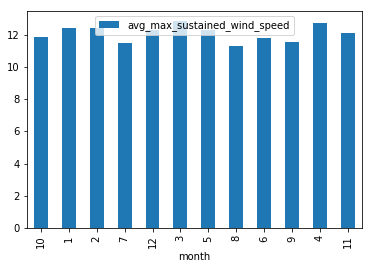

In [22]:
df = client.query(sql).to_dataframe()
df.plot(x='month', y='avg_max_sustained_wind_speed', kind='bar');